In [1]:
import cv2
from transformers import pipeline
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from stereFlow import genStereFlow,warpFlow

In [2]:
pipe = pipeline(task = "depth-estimation", model="LiheYoung/depth-anything-small-hf",device="cuda")

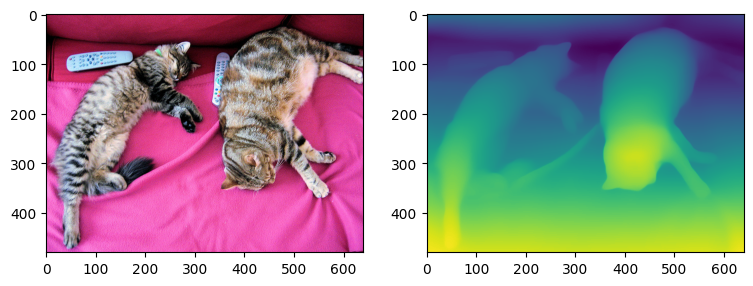

In [7]:
image = Image.open("image.png")
depth = pipe(image)["depth"]

img =np.array(image)
depth =np.array(depth).astype(np.float32)/255.0

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(depth)
plt.show()

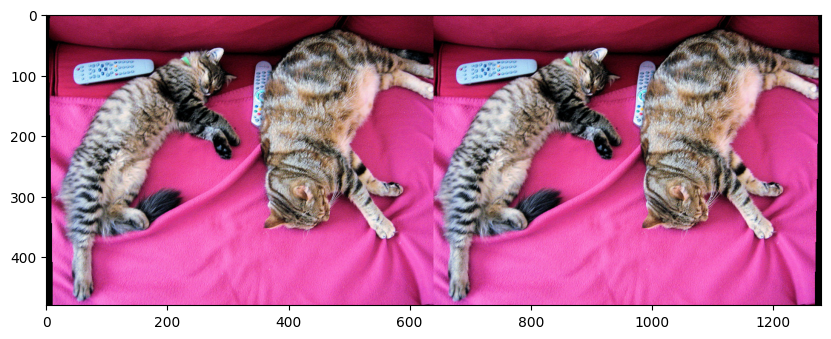

In [8]:
scale = 10.0
disp = scale*depth[:,:]

left_offset, right_offset = genStereFlow(disp)
left_offset = cv2.medianBlur(left_offset, 5)
right_offset = cv2.medianBlur(right_offset, 5)

left_img = warpFlow(img, left_offset)
right_img = warpFlow(img, right_offset)

du_image = np.concatenate((left_img, right_img), 1)

plt.figure(figsize=(10,6))
plt.imshow(du_image)
plt.show()